<a href="https://colab.research.google.com/github/akanil18/Invigilo/blob/main/breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/smallboy-code/Breast-cancer-dataset.git


Cloning into 'Breast-cancer-dataset'...
remote: Enumerating objects: 5224, done.
remote: Counting objects: 100% (267/267), done.
remote: Compressing objects: 100% (228/228), done.
remote: Total 5224 (delta 52), reused 230 (delta 29), pack-reused 4957 (from 1)
Receiving objects: 100% (5224/5224), 644.79 MiB | 37.46 MiB/s, done.
Resolving deltas: 100% (52/52), done.
Updating files: 100% (5139/5139), done.


In [2]:
%cd /content/Breast-cancer-dataset/Classification\ task


/content/Breast-cancer-dataset/Classification task


In [3]:
!ls

asserts		    LBP-master		     SvmPred.py
data_loader.py	    lpq.py		     test.py
decisionFusion.py   Models.py		     tools.py
features	    mytest.py		     train.py
featuresExtract.py  PhotoClassifySVM-master  vision_transformer
fusionModels.py     requirements.txt	     VIT_model.py
GLCM-master	    skSvm.py


In [4]:
!pip install pretrainedmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60945 sha256=94c71d80942a09717530cb306bc656950f47017afe7831873fdbf37316e6c77f
  Stored in directory: /root/.cache/pip/wheels/4c/01/56/40a48f75dbdfe167a0cb70d3b48913369a00ec5c4e9fed5f2b
Successfully built pretrainedmodels


In [5]:
!pip install lambda_networks

In [6]:
import Models

/usr/local/lib/python3.12/dist-packages/torch/functional.py:554: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4322.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [7]:
!pip install -q "pylibjpeg>=2.0" "pylibjpeg-libjpeg>=2.1" pylibjpeg-openjpeg pylibjpeg-rle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 272.3/272.3 kB 11.8 MB/s eta 0:00:00


In [8]:
!pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 40.0 MB/s eta 0:00:00


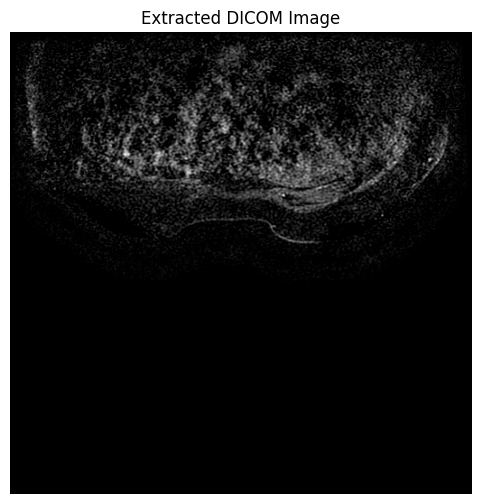

In [9]:
import pydicom
import matplotlib.pyplot as plt

# Path to your DICOM file
dcm_path = "/content/Breast-cancer-dataset/Breast cancer image samples/Malignant/BreaDM-Ma-1801/SUB2/p-000.dcm"

# Read DICOM image
ds = pydicom.dcmread(dcm_path)

# Extract pixel data (requires decoder plugins if compressed)
img = ds.pixel_array

# Plot the DICOM image
plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray')
plt.title("Extracted DICOM Image")
plt.axis('off')  # Hide axes
plt.show()


Conversion .dcm to png


In [10]:
%cd /content/Breast-cancer-dataset/


/content/Breast-cancer-dataset


In [11]:
import pydicom
from PIL import Image
from pathlib import Path
import os

# Define base directory (adjust if needed)
REPO_DIR = Path.cwd()  # Current working directory, usually '/content' in Colab

# Define paths
DCM_ROOT = REPO_DIR / 'Breast cancer image samples'
OUT_IMG_ROOT = REPO_DIR / 'breast_images_pydicom'   # Output directory name
OUT_IMG_ROOT.mkdir(parents=True, exist_ok=True)

converted = 0
failed = 0

# Traverse dataset
if DCM_ROOT.exists():
    for class_dir in sorted(DCM_ROOT.iterdir()):
        if not class_dir.is_dir():
            continue
        for patient in sorted(class_dir.iterdir()):
            if not patient.is_dir():
                continue
            files = list(patient.glob('**/*.dcm'))
            if not files:
                continue

            for f in files:
                try:
                    ds = pydicom.dcmread(f)
                    img = ds.pixel_array

                    # Create output path, keeping folder hierarchy
                    relative_path = f.relative_to(patient)
                    out_path = OUT_IMG_ROOT / class_dir.name / patient.name / relative_path.parent / (f.stem + '.png')
                    out_path.parent.mkdir(parents=True, exist_ok=True)

                    # Convert numpy array to PIL Image and save as PNG
                    img_pil = Image.fromarray(img)
                    img_pil.save(out_path)
                    converted += 1
                except Exception as e:
                    print(f"⚠️ Exception converting {f}: {e}")
                    failed += 1

    print(f"\n✅ Conversion completed successfully!")
    print(f"🖼️ Converted: {converted} PNG files")
    print(f"⚠️ Failed: {failed} files")
    print(f"📁 Output directory: {OUT_IMG_ROOT}")
else:
    print(f"❌ DICOM root not found at {DCM_ROOT}")

/tmp/ipython-input-580953532.py:41: DeprecationWarning: Saving I mode images as PNG is deprecated and will be removed in Pillow 13 (2026-10-15)
  img_pil.save(out_path)



✅ Conversion completed successfully!
🖼️ Converted: 4953 PNG files
⚠️ Failed: 0 files
📁 Output directory: /content/Breast-cancer-dataset/breast_images_pydicom


In [12]:
import shutil
import os

# Define the directory to be compressed
source_dir = '/content/Breast-cancer-dataset'
# Define the output filename (without extension)
output_filename = 'breast-cancer-dataset'
# Define the output directory
output_dir = '/content/'

# Create the archive
shutil.make_archive(os.path.join(output_dir, output_filename), 'gztar', source_dir)

print(f"Dataset compressed to {os.path.join(output_dir, output_filename)}.tar.gz")

Dataset compressed to /content/breast-cancer-dataset.tar.gz


png image visualize


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Path to your PNG image
png_path = "/content/Breast-cancer-dataset/breast_images_pydicom/Malignant/BreaDM-Ma-1801/SUB2/p-000.png"

# Open the image
img = Image.open(png_path)

# Display the image
plt.imshow(img, cmap='gray')  # Use cmap='gray' if it's grayscale
plt.axis('off')  # Hide axes
plt.show()


Training part


In [15]:
%cd /content/Breast-cancer-dataset/Classification\ task


/content/Breast-cancer-dataset/Classification task


In [16]:
%cd /content/Breast-cancer-dataset/Classification\ task

/content/Breast-cancer-dataset/Classification task


In [18]:
import numpy as np
import torch

class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement.
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
            path (str): Path for the checkpoint to be saved to.
                            Default: 'checkpoint.pt'
            trace_func (function): trace print function.
                            Default: print
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

In [19]:
def youden(tpr, fpr, thresholds):
    """
    Calculate the optimal threshold using the Youden index (J = TPR - FPR).
    """
    youden_index = tpr - fpr
    optimal_index = np.argmax(youden_index)
    optimal_threshold = thresholds[optimal_index]
    return optimal_index, optimal_threshold

Resnet101


In [20]:
from __future__ import print_function
import argparse
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
import os
import math
import data_loader
import Models
import time
from torch.utils import model_zoo
from sklearn import metrics

import numpy as np
import pandas as pd
from shutil import rmtree, copyfile
import random
from sklearn.metrics import roc_auc_score, auc, roc_curve
import matplotlib.pyplot as plt
from pathlib import Path
import fusionModels
import csv

# =============== Configuration ===============
batch_size = 32
model_name = 'resnet101'
gpu = '0'
num_class = 2
random_seed = 1
split_train_ratio = 0.8
task_name = 'breast-cancer-dataset'
path = '/content/Breast-cancer-dataset/breast_images_pydicom'
auto_split = '1'

os.environ["CUDA_VISIBLE_DEVICES"] = gpu
epochs = 100
lr = 0.01
momentum = 0.9
no_cuda = False
seed = 8
l2_decay = 0.01

source_name = "train"
target_name = "val"

cuda = not no_cuda and torch.cuda.is_available()
torch.manual_seed(seed)
if cuda:
    torch.cuda.manual_seed(seed)
kwargs = {'num_workers': 4, 'pin_memory': True} if cuda else {}


# =============== Dataset Split ===============
def split_data():
    original_classes = ['Benign', 'Malignant']

    for name in [source_name, 'val']:
        full_dir = os.path.join(path, name)
        if os.path.exists(full_dir):
            print(f"Removing existing directory: {full_dir}")
            rmtree(full_dir)
        print(f"Creating directory: {full_dir}")
        os.makedirs(full_dir, exist_ok=True)

    for class_name in original_classes:
        full_path_class = Path(path) / class_name
        if not full_path_class.is_dir():
            print(f"Warning: Class directory '{class_name}' not found at {full_path_class}. Skipping.")
            continue

        train_class_dir = Path(path) / 'train' / class_name
        val_class_dir = Path(path) / 'val' / class_name
        train_class_dir.mkdir(parents=True, exist_ok=True)
        val_class_dir.mkdir(parents=True, exist_ok=True)

        files = list(full_path_class.glob('**/*.png'))
        random.seed(random_seed)
        random.shuffle(files)

        split_index = int(len(files) * split_train_ratio)
        train_files = files[:split_index]
        val_files = files[split_index:]

        for file_path in train_files:
            dst_path = train_class_dir / file_path.name
            copyfile(file_path, dst_path)

        for file_path in val_files:
            dst_path = val_class_dir / file_path.name
            copyfile(file_path, dst_path)

    print('Data split complete.')


if auto_split == '1':
    split_data()

# =============== Loaders ===============
num_classes = len([d for d in os.listdir(os.path.join(path, source_name)) if os.path.isdir(os.path.join(path, source_name, d))])
source_loader = data_loader.load_training(path, source_name, batch_size, kwargs)
target_val_loader, names, label = data_loader.load_testing(path, target_name, batch_size, kwargs)

len_source_dataset = len(source_loader.dataset)
len_target_dataset = len(target_val_loader.dataset)


# =============== Helper Functions ===============
def youden(tpr, fpr, thresholds):
    youden_index = tpr - fpr
    max_index = np.argmax(youden_index)
    return max_index, thresholds[max_index]


def save_dict(model):
    state_dict = model.module.state_dict() if isinstance(model, nn.DataParallel) else model.state_dict()
    model_dir = f'model/{task_name}'
    os.makedirs(model_dir, exist_ok=True)
    torch.save(state_dict, f'{model_dir}/{model_name}.pth')


# =============== Training and Validation ===============
def train(epoch, model):
    LEARNING_RATE = max(lr * (0.1 ** (epoch // 10)), 1e-5)
    optimizer = torch.optim.SGD(
        [{'params': model.parameters()}],
        lr=LEARNING_RATE, momentum=momentum, weight_decay=l2_decay
    )

    model.train()
    correct = 0
    total_loss = 0.0

    print(f"Starting training epoch {epoch}...")
    try:
        for batch_idx, (data, label) in enumerate(source_loader):
            print(f"  Processing batch {batch_idx}...")
            data, label = data.float().cuda(), label.long().cuda()
            pred = model(data)
            loss = F.nll_loss(F.log_softmax(pred, dim=1), label)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item() * data.size(0)
            pred = pred.data.max(1)[1]
            correct += pred.eq(label.data.view_as(pred)).cpu().sum()
            print(f"    Batch loss: {loss.item():.4f}, Correct predictions in batch: {pred.eq(label.data.view_as(pred)).cpu().sum()}")


        avg_loss = total_loss / len_source_dataset
        acc = 100. * correct / len_source_dataset
        print(f"Train Epoch {epoch}: Total Loss {total_loss:.4f}, Avg Loss {avg_loss:.4f} | Correct {correct} | Accuracy {acc:.2f}% | LR {LEARNING_RATE}")
        return avg_loss, acc
    except Exception as e:
        print(f"An error occurred during training epoch {epoch}: {e}")
        # Return None or raise the exception, depending on desired behavior
        # Returning None might prevent the unpack error but requires handling in the caller
        # Raising the exception provides more detailed error information immediately
        raise # Re-raise the exception after printing


def val(model):
    model.eval()
    test_loss = 0.0
    correct = 0
    possbilitys = None
    pred_all = []

    print(f"Starting validation...")
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(target_val_loader):
            print(f"  Processing validation batch {batch_idx}...")
            if cuda:
                data, target = data.cuda(), target.cuda()
            s_output = model(data)
            loss = F.nll_loss(F.log_softmax(s_output, dim=1), target, reduction='sum')
            test_loss += loss.item()
            pred = s_output.data.max(1)[1]
            pred_all.append(pred.cpu().numpy())

            possbility = F.softmax(s_output, dim=1).cpu().data.numpy()
            possbilitys = possbility if possbilitys is None else np.append(possbilitys, possbility, axis=0)
            correct += pred.eq(target.data.view_as(pred)).cpu().sum()
            print(f"    Validation batch loss: {loss.item():.4f}, Correct predictions in batch: {pred.eq(target.data.view_as(pred)).cpu().sum()}")


    pred_all = [i for item in pred_all for i in item]
    cm = metrics.confusion_matrix(label, pred_all)
    label_onehot = np.eye(num_classes)[np.array(label).astype(np.int32).tolist()]
    fpr, tpr, thresholds = roc_curve(label_onehot.ravel(), possbilitys.ravel())
    index, optimal_threshold = youden(tpr, fpr, thresholds)
    auc_value = auc(fpr, tpr)
    test_loss /= len_target_dataset

    acc = 100. * correct / len_target_dataset
    print(f"{target_name} set: Avg Loss {test_loss:.4f} | Accuracy {acc:.2f}% | AUC {auc_value:.4f}")
    return acc, test_loss, auc_value


# =============== Main ===============
if __name__ == '__main__':
    if model_name == 'resnet101':
        model = Models.Resnet101(num_classes=num_classes)
    elif model_name == 'resnext101':
        model = Models.Resnext101(num_classes=num_classes)
    elif model_name == 'densenet201':
        model = Models.Densnet201(num_classes=num_classes)
    elif model_name == 'resnet50':
        model = Models.Resnet50(num_classes=num_classes)
    elif model_name == 'densenet169':
        model = Models.Densenet169(num_classes=num_classes)
    elif model_name == 'vgg16':
        model = Models.vgg16(num_classes=num_classes)
    elif model_name == 'senet101':
        model = Models.Senet101(num_classes=num_classes)
    elif model_name == 'resnet18':
        model = Models.Resnet18(num_classes=num_classes)
    elif model_name == 'mynet':
        model = Models.MyNet(num_classes=num_classes)
    elif model_name == 'senet50':
        model = Models.Senet50(num_classes=num_classes)
    elif model_name == 'resnet152':
        model = Models.Resnet152(num_classes=num_classes)
    elif model_name == 'fusion':
        model = fusionModels.FusionM(num_classes=num_classes, load_vit=True)

    print(model)
    model = torch.nn.DataParallel(model, device_ids=list(range(len(gpu.split(',')))))
    model.cuda()

    best_auc = 0
    early_stopping = EarlyStopping(patience=20, verbose=True)

    # Tracking lists
    train_acc_list_resnet101, val_acc_list_resnet101 = [], []
    train_loss_list_resnet101, val_loss_list_resnet101 = [] , []

    for epoch in range(1, epochs + 1):
        try:
            train_loss, train_acc = train(epoch, model)
            train_loss_list_resnet101.append(train_loss)
            train_acc_list_resnet101.append(train_acc)

            with torch.no_grad():
                val_acc, val_loss, auc_val = val(model)
            val_loss_list_resnet101.append(val_loss)
            val_acc_list_resnet101.append(val_acc)


            state_dict = model.module.state_dict() if isinstance(model, nn.DataParallel) else model.state_dict()
            model_dir = os.path.join('model', task_name)
            os.makedirs(model_dir, exist_ok=True)

            early_stopping(val_loss, model)

            if auc_val > best_auc:
                best_auc = auc_val
                torch.save(state_dict, os.path.join(model_dir, f'{model_name}_epoch{epoch}.pth'),
                           _use_new_zipfile_serialization=False)
                print("Model saved (best AUC).")

            if early_stopping.early_stop:
                print("Early stopping triggered.")
                break
        except Exception as e:
            print(f"Skipping epoch {epoch} due to error: {e}")
            continue # Skip to the next epoch if an error occurs

    # Save the final trained model state dictionary
    final_model_path = os.path.join(model_dir, f'{model_name}_final.pth')
    state_dict = model.module.state_dict() if isinstance(model, nn.DataParallel) else model.state_dict()
    torch.save(state_dict, final_model_path, _use_new_zipfile_serialization=False)
    print(f"Final trained model saved to: {final_model_path}")

    # Save metrics to CSV
    log_path = os.path.join('model', task_name, 'training_log.csv')
    with open(log_path, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['Epoch', 'Train_Accuracy', 'Val_Accuracy', 'Train_Loss', 'Val_Loss'])
        for i in range(len(train_acc_list_resnet101)):
            writer.writerow([i + 1, train_acc_list_resnet101[i], val_acc_list_resnet101[i], train_loss_list_resnet101[i], val_loss_list_resnet101[i]])

    print(f"Training log saved to {log_path}")

Removing existing directory: /content/Breast-cancer-dataset/breast_images_pydicom/train
Creating directory: /content/Breast-cancer-dataset/breast_images_pydicom/train
Removing existing directory: /content/Breast-cancer-dataset/breast_images_pydicom/val
Creating directory: /content/Breast-cancer-dataset/breast_images_pydicom/val
Data split complete.
Resnet101(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


  Processing batch 0...
    Batch loss: 0.5732, Correct predictions in batch: 23
  Processing batch 1...
    Batch loss: 0.7404, Correct predictions in batch: 17
  Processing batch 2...
    Batch loss: 0.5945, Correct predictions in batch: 20
  Processing batch 3...
    Batch loss: 0.4533, Correct predictions in batch: 27
Train Epoch 2: Total Loss 75.5596, Avg Loss 0.5105 | Correct 87 | Accuracy 58.78% | LR 0.01
Starting validation...
  Processing validation batch 0...
    Validation batch loss: 4.1219, Correct predictions in batch: 32
  Processing validation batch 1...
    Validation batch loss: 4.6171, Correct predictions in batch: 32
  Processing validation batch 2...
    Validation batch loss: 27.4229, Correct predictions in batch: 14
  Processing validation batch 3...
    Validation batch loss: 25.4665, Correct predictions in batch: 9
  Processing validation batch 4...
    Validation batch loss: 24.5696, Correct predictions in batch: 0
val set: Avg Loss 0.5824 | Accuracy 58.78% | 

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


  Processing batch 0...
    Batch loss: 0.4001, Correct predictions in batch: 27
  Processing batch 1...
    Batch loss: 0.4627, Correct predictions in batch: 24
  Processing batch 2...
    Batch loss: 0.2834, Correct predictions in batch: 30
  Processing batch 3...
    Batch loss: 0.4263, Correct predictions in batch: 26
Train Epoch 3: Total Loss 50.3185, Avg Loss 0.3400 | Correct 107 | Accuracy 72.30% | LR 0.01
Starting validation...
  Processing validation batch 0...
    Validation batch loss: 2.6646, Correct predictions in batch: 32
  Processing validation batch 1...
    Validation batch loss: 3.1346, Correct predictions in batch: 32
  Processing validation batch 2...
    Validation batch loss: 24.3265, Correct predictions in batch: 19
  Processing validation batch 3...
    Validation batch loss: 14.8339, Correct predictions in batch: 26
  Processing validation batch 4...
    Validation batch loss: 21.7536, Correct predictions in batch: 5
val set: Avg Loss 0.4508 | Accuracy 77.03% 

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


  Processing batch 0...
    Batch loss: 0.2067, Correct predictions in batch: 30
  Processing batch 1...
    Batch loss: 0.1914, Correct predictions in batch: 30
  Processing batch 2...
    Batch loss: 0.2289, Correct predictions in batch: 31
  Processing batch 3...
    Batch loss: 0.2801, Correct predictions in batch: 30
Train Epoch 4: Total Loss 29.0278, Avg Loss 0.1961 | Correct 121 | Accuracy 81.76% | LR 0.01
Starting validation...
  Processing validation batch 0...
    Validation batch loss: 1.7987, Correct predictions in batch: 32
  Processing validation batch 1...
    Validation batch loss: 1.4679, Correct predictions in batch: 32
  Processing validation batch 2...
    Validation batch loss: 22.0764, Correct predictions in batch: 18
  Processing validation batch 3...
    Validation batch loss: 16.3404, Correct predictions in batch: 25
  Processing validation batch 4...
    Validation batch loss: 17.6253, Correct predictions in batch: 10
val set: Avg Loss 0.4007 | Accuracy 79.05%

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


  Processing batch 0...
    Batch loss: 0.2828, Correct predictions in batch: 29
  Processing batch 1...
    Batch loss: 0.1503, Correct predictions in batch: 30
  Processing batch 2...
    Batch loss: 0.4205, Correct predictions in batch: 28
  Processing batch 3...
    Batch loss: 0.3275, Correct predictions in batch: 26
Train Epoch 5: Total Loss 37.7939, Avg Loss 0.2554 | Correct 113 | Accuracy 76.35% | LR 0.01
Starting validation...
  Processing validation batch 0...
    Validation batch loss: 0.3433, Correct predictions in batch: 32
  Processing validation batch 1...
    Validation batch loss: 0.1718, Correct predictions in batch: 32
  Processing validation batch 2...
    Validation batch loss: 44.3111, Correct predictions in batch: 18
  Processing validation batch 3...
    Validation batch loss: 40.2772, Correct predictions in batch: 16
  Processing validation batch 4...
    Validation batch loss: 27.7391, Correct predictions in batch: 7
val set: Avg Loss 0.7624 | Accuracy 70.95% 

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


  Processing batch 0...
    Batch loss: 0.1884, Correct predictions in batch: 30
  Processing batch 1...
    Batch loss: 0.1406, Correct predictions in batch: 31
  Processing batch 2...
    Batch loss: 0.0726, Correct predictions in batch: 31
  Processing batch 3...
    Batch loss: 0.3408, Correct predictions in batch: 25
Train Epoch 6: Total Loss 23.7568, Avg Loss 0.1605 | Correct 117 | Accuracy 79.05% | LR 0.01
Starting validation...
  Processing validation batch 0...
    Validation batch loss: 3.1707, Correct predictions in batch: 32
  Processing validation batch 1...
    Validation batch loss: 1.0690, Correct predictions in batch: 32
  Processing validation batch 2...
    Validation batch loss: 13.0050, Correct predictions in batch: 26
  Processing validation batch 3...
    Validation batch loss: 10.2421, Correct predictions in batch: 26
  Processing validation batch 4...
    Validation batch loss: 10.2784, Correct predictions in batch: 13
val set: Avg Loss 0.2552 | Accuracy 87.16%

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


  Processing batch 0...
    Batch loss: 0.2134, Correct predictions in batch: 31
  Processing batch 1...
    Batch loss: 0.1607, Correct predictions in batch: 29
  Processing batch 2...
    Batch loss: 0.2071, Correct predictions in batch: 30
  Processing batch 3...
    Batch loss: 0.1684, Correct predictions in batch: 31
Train Epoch 7: Total Loss 23.9865, Avg Loss 0.1621 | Correct 121 | Accuracy 81.76% | LR 0.01
Starting validation...
  Processing validation batch 0...
    Validation batch loss: 8.8645, Correct predictions in batch: 31
  Processing validation batch 1...
    Validation batch loss: 11.4967, Correct predictions in batch: 27
  Processing validation batch 2...
    Validation batch loss: 7.8496, Correct predictions in batch: 28
  Processing validation batch 3...
    Validation batch loss: 1.4227, Correct predictions in batch: 32
  Processing validation batch 4...
    Validation batch loss: 3.5507, Correct predictions in batch: 20
val set: Avg Loss 0.2242 | Accuracy 93.24% |

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


  Processing batch 0...
    Batch loss: 0.1914, Correct predictions in batch: 29
  Processing batch 1...
    Batch loss: 0.0598, Correct predictions in batch: 32
  Processing batch 2...
    Batch loss: 0.0552, Correct predictions in batch: 32
  Processing batch 3...
    Batch loss: 0.2087, Correct predictions in batch: 29
Train Epoch 8: Total Loss 16.4853, Avg Loss 0.1114 | Correct 122 | Accuracy 82.43% | LR 0.01
Starting validation...
  Processing validation batch 0...
    Validation batch loss: 3.2357, Correct predictions in batch: 31
  Processing validation batch 1...
    Validation batch loss: 1.4504, Correct predictions in batch: 32
  Processing validation batch 2...
    Validation batch loss: 16.8443, Correct predictions in batch: 22
  Processing validation batch 3...
    Validation batch loss: 6.6178, Correct predictions in batch: 31
  Processing validation batch 4...
    Validation batch loss: 15.2229, Correct predictions in batch: 11
val set: Avg Loss 0.2930 | Accuracy 85.81% 

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


  Processing batch 0...
    Batch loss: 0.0207, Correct predictions in batch: 32
  Processing batch 1...
    Batch loss: 0.1323, Correct predictions in batch: 31
  Processing batch 2...
    Batch loss: 0.0894, Correct predictions in batch: 32
  Processing batch 3...
    Batch loss: 0.4153, Correct predictions in batch: 28
Train Epoch 9: Total Loss 21.0448, Avg Loss 0.1422 | Correct 123 | Accuracy 83.11% | LR 0.01
Starting validation...
  Processing validation batch 0...
    Validation batch loss: 1.3202, Correct predictions in batch: 32
  Processing validation batch 1...
    Validation batch loss: 0.6090, Correct predictions in batch: 32
  Processing validation batch 2...
    Validation batch loss: 15.3140, Correct predictions in batch: 24
  Processing validation batch 3...
    Validation batch loss: 4.5683, Correct predictions in batch: 32
  Processing validation batch 4...
    Validation batch loss: 8.4410, Correct predictions in batch: 17
val set: Avg Loss 0.2044 | Accuracy 92.57% |

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


  Processing batch 0...
    Batch loss: 0.0574, Correct predictions in batch: 31
  Processing batch 1...
    Batch loss: 0.0602, Correct predictions in batch: 31
  Processing batch 2...
    Batch loss: 0.0128, Correct predictions in batch: 32
  Processing batch 3...
    Batch loss: 0.0286, Correct predictions in batch: 32
Train Epoch 10: Total Loss 5.0927, Avg Loss 0.0344 | Correct 126 | Accuracy 85.14% | LR 0.001
Starting validation...
  Processing validation batch 0...
    Validation batch loss: 0.8023, Correct predictions in batch: 32
  Processing validation batch 1...
    Validation batch loss: 0.2903, Correct predictions in batch: 32
  Processing validation batch 2...
    Validation batch loss: 18.1810, Correct predictions in batch: 24
  Processing validation batch 3...
    Validation batch loss: 4.1533, Correct predictions in batch: 31
  Processing validation batch 4...
    Validation batch loss: 8.8253, Correct predictions in batch: 16
val set: Avg Loss 0.2179 | Accuracy 91.22% 

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


  Processing batch 0...
    Batch loss: 0.0232, Correct predictions in batch: 32
  Processing batch 1...
    Batch loss: 0.0304, Correct predictions in batch: 32
  Processing batch 2...
    Batch loss: 0.0317, Correct predictions in batch: 32
  Processing batch 3...
    Batch loss: 0.1104, Correct predictions in batch: 30
Train Epoch 11: Total Loss 6.2636, Avg Loss 0.0423 | Correct 126 | Accuracy 85.14% | LR 0.001
Starting validation...
  Processing validation batch 0...
    Validation batch loss: 0.7651, Correct predictions in batch: 32
  Processing validation batch 1...
    Validation batch loss: 0.2139, Correct predictions in batch: 32
  Processing validation batch 2...
    Validation batch loss: 16.0402, Correct predictions in batch: 25
  Processing validation batch 3...
    Validation batch loss: 3.5822, Correct predictions in batch: 31
  Processing validation batch 4...
    Validation batch loss: 6.1495, Correct predictions in batch: 18
val set: Avg Loss 0.1807 | Accuracy 93.24% 

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


  Processing batch 0...
    Batch loss: 0.0451, Correct predictions in batch: 31
  Processing batch 1...
    Batch loss: 0.0426, Correct predictions in batch: 32
  Processing batch 2...
    Batch loss: 0.0436, Correct predictions in batch: 31
  Processing batch 3...
    Batch loss: 0.0522, Correct predictions in batch: 31
Train Epoch 12: Total Loss 5.8733, Avg Loss 0.0397 | Correct 125 | Accuracy 84.46% | LR 0.001
Starting validation...
  Processing validation batch 0...
    Validation batch loss: 0.7594, Correct predictions in batch: 32
  Processing validation batch 1...
    Validation batch loss: 0.1666, Correct predictions in batch: 32
  Processing validation batch 2...
    Validation batch loss: 14.9741, Correct predictions in batch: 25
  Processing validation batch 3...
    Validation batch loss: 4.0026, Correct predictions in batch: 31
  Processing validation batch 4...
    Validation batch loss: 4.4378, Correct predictions in batch: 19
val set: Avg Loss 0.1645 | Accuracy 93.92% 

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


  Processing batch 0...
    Batch loss: 0.0363, Correct predictions in batch: 32
  Processing batch 1...
    Batch loss: 0.0748, Correct predictions in batch: 32
  Processing batch 2...
    Batch loss: 0.0361, Correct predictions in batch: 32
  Processing batch 3...
    Batch loss: 0.0356, Correct predictions in batch: 32
Train Epoch 13: Total Loss 5.8525, Avg Loss 0.0395 | Correct 128 | Accuracy 86.49% | LR 0.001
Starting validation...
  Processing validation batch 0...
    Validation batch loss: 0.4609, Correct predictions in batch: 32
  Processing validation batch 1...
    Validation batch loss: 0.0938, Correct predictions in batch: 32
  Processing validation batch 2...
    Validation batch loss: 17.0444, Correct predictions in batch: 25
  Processing validation batch 3...
    Validation batch loss: 5.6037, Correct predictions in batch: 31
  Processing validation batch 4...
    Validation batch loss: 4.9679, Correct predictions in batch: 18
val set: Avg Loss 0.1903 | Accuracy 93.24% 

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


  Processing batch 0...
    Batch loss: 0.0328, Correct predictions in batch: 32
  Processing batch 1...
    Batch loss: 0.0287, Correct predictions in batch: 32
  Processing batch 2...
    Batch loss: 0.0293, Correct predictions in batch: 32
  Processing batch 3...
    Batch loss: 0.0853, Correct predictions in batch: 32
Train Epoch 14: Total Loss 5.6352, Avg Loss 0.0381 | Correct 128 | Accuracy 86.49% | LR 0.001
Starting validation...
  Processing validation batch 0...
    Validation batch loss: 0.4214, Correct predictions in batch: 32
  Processing validation batch 1...
    Validation batch loss: 0.0863, Correct predictions in batch: 32
  Processing validation batch 2...
    Validation batch loss: 15.8011, Correct predictions in batch: 25
  Processing validation batch 3...
    Validation batch loss: 5.6146, Correct predictions in batch: 31
  Processing validation batch 4...
    Validation batch loss: 4.2888, Correct predictions in batch: 18
val set: Avg Loss 0.1771 | Accuracy 93.24% 

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


  Processing batch 0...
    Batch loss: 0.0368, Correct predictions in batch: 32
  Processing batch 1...
    Batch loss: 0.0266, Correct predictions in batch: 32
  Processing batch 2...
    Batch loss: 0.0326, Correct predictions in batch: 32
  Processing batch 3...
    Batch loss: 0.0372, Correct predictions in batch: 32
Train Epoch 15: Total Loss 4.2614, Avg Loss 0.0288 | Correct 128 | Accuracy 86.49% | LR 0.001
Starting validation...
  Processing validation batch 0...
    Validation batch loss: 0.3022, Correct predictions in batch: 32
  Processing validation batch 1...
    Validation batch loss: 0.0865, Correct predictions in batch: 32
  Processing validation batch 2...
    Validation batch loss: 17.1883, Correct predictions in batch: 25
  Processing validation batch 3...
    Validation batch loss: 4.7676, Correct predictions in batch: 31
  Processing validation batch 4...
    Validation batch loss: 5.1936, Correct predictions in batch: 18
val set: Avg Loss 0.1861 | Accuracy 93.24% 

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


  Processing batch 0...
    Batch loss: 0.0206, Correct predictions in batch: 32
  Processing batch 1...
    Batch loss: 0.1062, Correct predictions in batch: 31
  Processing batch 2...
    Batch loss: 0.1021, Correct predictions in batch: 30
  Processing batch 3...
    Batch loss: 0.0127, Correct predictions in batch: 32
Train Epoch 16: Total Loss 7.7302, Avg Loss 0.0522 | Correct 125 | Accuracy 84.46% | LR 0.001
Starting validation...
  Processing validation batch 0...
    Validation batch loss: 0.3861, Correct predictions in batch: 32
  Processing validation batch 1...
    Validation batch loss: 0.0874, Correct predictions in batch: 32
  Processing validation batch 2...
    Validation batch loss: 17.2661, Correct predictions in batch: 25
  Processing validation batch 3...
    Validation batch loss: 5.8653, Correct predictions in batch: 30
  Processing validation batch 4...
    Validation batch loss: 5.4027, Correct predictions in batch: 18
val set: Avg Loss 0.1960 | Accuracy 92.57% 

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


  Processing batch 0...
    Batch loss: 0.0187, Correct predictions in batch: 32
  Processing batch 1...
    Batch loss: 0.0444, Correct predictions in batch: 32
  Processing batch 2...
    Batch loss: 0.0660, Correct predictions in batch: 31
  Processing batch 3...
    Batch loss: 0.0179, Correct predictions in batch: 32
Train Epoch 17: Total Loss 4.7034, Avg Loss 0.0318 | Correct 127 | Accuracy 85.81% | LR 0.001
Starting validation...
  Processing validation batch 0...
    Validation batch loss: 0.2991, Correct predictions in batch: 32
  Processing validation batch 1...
    Validation batch loss: 0.0880, Correct predictions in batch: 32
  Processing validation batch 2...
    Validation batch loss: 18.9778, Correct predictions in batch: 25
  Processing validation batch 3...
    Validation batch loss: 5.2061, Correct predictions in batch: 30
  Processing validation batch 4...
    Validation batch loss: 6.9148, Correct predictions in batch: 17
val set: Avg Loss 0.2127 | Accuracy 91.89% 

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


  Processing batch 0...
    Batch loss: 0.0240, Correct predictions in batch: 32
  Processing batch 1...
    Batch loss: 0.0220, Correct predictions in batch: 32
  Processing batch 2...
    Batch loss: 0.0186, Correct predictions in batch: 32
  Processing batch 3...
    Batch loss: 0.0516, Correct predictions in batch: 31
Train Epoch 18: Total Loss 3.7184, Avg Loss 0.0251 | Correct 127 | Accuracy 85.81% | LR 0.001
Starting validation...
  Processing validation batch 0...
    Validation batch loss: 0.2536, Correct predictions in batch: 32
  Processing validation batch 1...
    Validation batch loss: 0.0778, Correct predictions in batch: 32
  Processing validation batch 2...
    Validation batch loss: 18.7702, Correct predictions in batch: 25
  Processing validation batch 3...
    Validation batch loss: 5.1375, Correct predictions in batch: 31
  Processing validation batch 4...
    Validation batch loss: 6.4772, Correct predictions in batch: 18
val set: Avg Loss 0.2075 | Accuracy 93.24% 

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


  Processing batch 0...
    Batch loss: 0.0537, Correct predictions in batch: 31
  Processing batch 1...
    Batch loss: 0.0483, Correct predictions in batch: 32
  Processing batch 2...
    Batch loss: 0.0338, Correct predictions in batch: 32
  Processing batch 3...
    Batch loss: 0.0296, Correct predictions in batch: 32
Train Epoch 19: Total Loss 5.2929, Avg Loss 0.0358 | Correct 127 | Accuracy 85.81% | LR 0.001
Starting validation...
  Processing validation batch 0...
    Validation batch loss: 0.1446, Correct predictions in batch: 32
  Processing validation batch 1...
    Validation batch loss: 0.0537, Correct predictions in batch: 32
  Processing validation batch 2...
    Validation batch loss: 22.1875, Correct predictions in batch: 24
  Processing validation batch 3...
    Validation batch loss: 5.3377, Correct predictions in batch: 30
  Processing validation batch 4...
    Validation batch loss: 7.7128, Correct predictions in batch: 18
val set: Avg Loss 0.2394 | Accuracy 91.89% 

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


  Processing batch 0...
    Batch loss: 0.0323, Correct predictions in batch: 32
  Processing batch 1...
    Batch loss: 0.0652, Correct predictions in batch: 31
  Processing batch 2...
    Batch loss: 0.0180, Correct predictions in batch: 32
  Processing batch 3...
    Batch loss: 0.0361, Correct predictions in batch: 32
Train Epoch 20: Total Loss 4.8524, Avg Loss 0.0328 | Correct 127 | Accuracy 85.81% | LR 0.00010000000000000002
Starting validation...
  Processing validation batch 0...
    Validation batch loss: 0.1703, Correct predictions in batch: 32
  Processing validation batch 1...
    Validation batch loss: 0.0576, Correct predictions in batch: 32
  Processing validation batch 2...
    Validation batch loss: 20.4034, Correct predictions in batch: 24
  Processing validation batch 3...
    Validation batch loss: 4.8204, Correct predictions in batch: 31
  Processing validation batch 4...
    Validation batch loss: 6.7041, Correct predictions in batch: 18
val set: Avg Loss 0.2173 |

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


  Processing batch 0...
    Batch loss: 0.0137, Correct predictions in batch: 32
  Processing batch 1...
    Batch loss: 0.0184, Correct predictions in batch: 32
  Processing batch 2...
    Batch loss: 0.0355, Correct predictions in batch: 32
  Processing batch 3...
    Batch loss: 0.1147, Correct predictions in batch: 30
Train Epoch 21: Total Loss 5.8331, Avg Loss 0.0394 | Correct 126 | Accuracy 85.14% | LR 0.00010000000000000002
Starting validation...
  Processing validation batch 0...
    Validation batch loss: 0.2013, Correct predictions in batch: 32
  Processing validation batch 1...
    Validation batch loss: 0.0696, Correct predictions in batch: 32
  Processing validation batch 2...
    Validation batch loss: 18.9106, Correct predictions in batch: 25
  Processing validation batch 3...
    Validation batch loss: 4.2714, Correct predictions in batch: 31
  Processing validation batch 4...
    Validation batch loss: 6.0345, Correct predictions in batch: 18
val set: Avg Loss 0.1992 |

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


  Processing batch 0...
    Batch loss: 0.0225, Correct predictions in batch: 32
  Processing batch 1...
    Batch loss: 0.0342, Correct predictions in batch: 32
  Processing batch 2...
    Batch loss: 0.0453, Correct predictions in batch: 31
  Processing batch 3...
    Batch loss: 0.0550, Correct predictions in batch: 32
Train Epoch 22: Total Loss 5.0217, Avg Loss 0.0339 | Correct 127 | Accuracy 85.81% | LR 0.00010000000000000002
Starting validation...
  Processing validation batch 0...
    Validation batch loss: 0.2163, Correct predictions in batch: 32
  Processing validation batch 1...
    Validation batch loss: 0.0769, Correct predictions in batch: 32
  Processing validation batch 2...
    Validation batch loss: 18.2177, Correct predictions in batch: 25
  Processing validation batch 3...
    Validation batch loss: 3.9646, Correct predictions in batch: 31
  Processing validation batch 4...
    Validation batch loss: 5.8921, Correct predictions in batch: 18
val set: Avg Loss 0.1917 |

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


  Processing batch 0...
    Batch loss: 0.0367, Correct predictions in batch: 32
  Processing batch 1...
    Batch loss: 0.0255, Correct predictions in batch: 32
  Processing batch 2...
    Batch loss: 0.0175, Correct predictions in batch: 32
  Processing batch 3...
    Batch loss: 0.0153, Correct predictions in batch: 32
Train Epoch 23: Total Loss 3.0430, Avg Loss 0.0206 | Correct 128 | Accuracy 86.49% | LR 0.00010000000000000002
Starting validation...
  Processing validation batch 0...
    Validation batch loss: 0.1928, Correct predictions in batch: 32
  Processing validation batch 1...
    Validation batch loss: 0.0642, Correct predictions in batch: 32
  Processing validation batch 2...
    Validation batch loss: 19.9862, Correct predictions in batch: 25
  Processing validation batch 3...
    Validation batch loss: 4.6112, Correct predictions in batch: 31
  Processing validation batch 4...
    Validation batch loss: 6.7588, Correct predictions in batch: 18
val set: Avg Loss 0.2136 |

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


  Processing batch 0...
    Batch loss: 0.0349, Correct predictions in batch: 32
  Processing batch 1...
    Batch loss: 0.0790, Correct predictions in batch: 31
  Processing batch 2...
    Batch loss: 0.0726, Correct predictions in batch: 31
  Processing batch 3...
    Batch loss: 0.0297, Correct predictions in batch: 32
Train Epoch 24: Total Loss 6.9166, Avg Loss 0.0467 | Correct 126 | Accuracy 85.14% | LR 0.00010000000000000002
Starting validation...
  Processing validation batch 0...
    Validation batch loss: 0.2110, Correct predictions in batch: 32
  Processing validation batch 1...
    Validation batch loss: 0.0718, Correct predictions in batch: 32
  Processing validation batch 2...
    Validation batch loss: 19.0288, Correct predictions in batch: 25
  Processing validation batch 3...
    Validation batch loss: 3.8750, Correct predictions in batch: 31
  Processing validation batch 4...
    Validation batch loss: 6.2585, Correct predictions in batch: 18
val set: Avg Loss 0.1990 |

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


  Processing batch 0...
    Batch loss: 0.0515, Correct predictions in batch: 32
  Processing batch 1...
    Batch loss: 0.0361, Correct predictions in batch: 32
  Processing batch 2...
    Batch loss: 0.1324, Correct predictions in batch: 30
  Processing batch 3...
    Batch loss: 0.0194, Correct predictions in batch: 32
Train Epoch 25: Total Loss 7.6626, Avg Loss 0.0518 | Correct 126 | Accuracy 85.14% | LR 0.00010000000000000002
Starting validation...
  Processing validation batch 0...
    Validation batch loss: 0.2339, Correct predictions in batch: 32
  Processing validation batch 1...
    Validation batch loss: 0.0744, Correct predictions in batch: 32
  Processing validation batch 2...
    Validation batch loss: 18.8673, Correct predictions in batch: 25
  Processing validation batch 3...
    Validation batch loss: 3.8574, Correct predictions in batch: 31
  Processing validation batch 4...
    Validation batch loss: 5.9959, Correct predictions in batch: 18
val set: Avg Loss 0.1961 |

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


  Processing batch 0...
    Batch loss: 0.0265, Correct predictions in batch: 32
  Processing batch 1...
    Batch loss: 0.0160, Correct predictions in batch: 32
  Processing batch 2...
    Batch loss: 0.0282, Correct predictions in batch: 32
  Processing batch 3...
    Batch loss: 0.0267, Correct predictions in batch: 32
Train Epoch 26: Total Loss 3.1186, Avg Loss 0.0211 | Correct 128 | Accuracy 86.49% | LR 0.00010000000000000002
Starting validation...
  Processing validation batch 0...
    Validation batch loss: 0.2066, Correct predictions in batch: 32
  Processing validation batch 1...
    Validation batch loss: 0.0691, Correct predictions in batch: 32
  Processing validation batch 2...
    Validation batch loss: 19.6188, Correct predictions in batch: 25
  Processing validation batch 3...
    Validation batch loss: 4.1627, Correct predictions in batch: 31
  Processing validation batch 4...
    Validation batch loss: 6.6606, Correct predictions in batch: 18
val set: Avg Loss 0.2076 |

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


  Processing batch 0...
    Batch loss: 0.0526, Correct predictions in batch: 32
  Processing batch 1...
    Batch loss: 0.0511, Correct predictions in batch: 31
  Processing batch 2...
    Batch loss: 0.0189, Correct predictions in batch: 32
  Processing batch 3...
    Batch loss: 0.0410, Correct predictions in batch: 32
Train Epoch 27: Total Loss 5.2355, Avg Loss 0.0354 | Correct 127 | Accuracy 85.81% | LR 0.00010000000000000002
Starting validation...
  Processing validation batch 0...
    Validation batch loss: 0.1742, Correct predictions in batch: 32
  Processing validation batch 1...
    Validation batch loss: 0.0548, Correct predictions in batch: 32
  Processing validation batch 2...
    Validation batch loss: 20.7004, Correct predictions in batch: 25
  Processing validation batch 3...
    Validation batch loss: 4.9011, Correct predictions in batch: 31
  Processing validation batch 4...
    Validation batch loss: 7.0421, Correct predictions in batch: 17
val set: Avg Loss 0.2221 |

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


  Processing batch 0...
    Batch loss: 0.0238, Correct predictions in batch: 32
  Processing batch 1...
    Batch loss: 0.0723, Correct predictions in batch: 32
  Processing batch 2...
    Batch loss: 0.0297, Correct predictions in batch: 32
  Processing batch 3...
    Batch loss: 0.1049, Correct predictions in batch: 31
Train Epoch 28: Total Loss 7.3801, Avg Loss 0.0499 | Correct 127 | Accuracy 85.81% | LR 0.00010000000000000002
Starting validation...
  Processing validation batch 0...
    Validation batch loss: 0.2105, Correct predictions in batch: 32
  Processing validation batch 1...
    Validation batch loss: 0.0673, Correct predictions in batch: 32
  Processing validation batch 2...
    Validation batch loss: 19.1771, Correct predictions in batch: 25
  Processing validation batch 3...
    Validation batch loss: 4.1863, Correct predictions in batch: 31
  Processing validation batch 4...
    Validation batch loss: 6.1478, Correct predictions in batch: 18
val set: Avg Loss 0.2013 |

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


  Processing batch 0...
    Batch loss: 0.0252, Correct predictions in batch: 32
  Processing batch 1...
    Batch loss: 0.0397, Correct predictions in batch: 32
  Processing batch 2...
    Batch loss: 0.0412, Correct predictions in batch: 32
  Processing batch 3...
    Batch loss: 0.0260, Correct predictions in batch: 32
Train Epoch 29: Total Loss 4.2280, Avg Loss 0.0286 | Correct 128 | Accuracy 86.49% | LR 0.00010000000000000002
Starting validation...
  Processing validation batch 0...
    Validation batch loss: 0.2028, Correct predictions in batch: 32
  Processing validation batch 1...
    Validation batch loss: 0.0654, Correct predictions in batch: 32
  Processing validation batch 2...
    Validation batch loss: 18.9815, Correct predictions in batch: 25
  Processing validation batch 3...
    Validation batch loss: 4.1433, Correct predictions in batch: 31
  Processing validation batch 4...
    Validation batch loss: 6.1768, Correct predictions in batch: 18
val set: Avg Loss 0.1998 |

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


  Processing batch 0...
    Batch loss: 0.0525, Correct predictions in batch: 31
  Processing batch 1...
    Batch loss: 0.0433, Correct predictions in batch: 32
  Processing batch 2...
    Batch loss: 0.0378, Correct predictions in batch: 32
  Processing batch 3...
    Batch loss: 0.0193, Correct predictions in batch: 32
Train Epoch 30: Total Loss 4.8934, Avg Loss 0.0331 | Correct 127 | Accuracy 85.81% | LR 1.0000000000000003e-05
Starting validation...
  Processing validation batch 0...
    Validation batch loss: 0.1871, Correct predictions in batch: 32
  Processing validation batch 1...
    Validation batch loss: 0.0595, Correct predictions in batch: 32
  Processing validation batch 2...
    Validation batch loss: 20.3635, Correct predictions in batch: 25
  Processing validation batch 3...
    Validation batch loss: 4.5305, Correct predictions in batch: 31
  Processing validation batch 4...
    Validation batch loss: 7.1063, Correct predictions in batch: 17
val set: Avg Loss 0.2179 |

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


  Processing batch 0...
    Batch loss: 0.0126, Correct predictions in batch: 32
  Processing batch 1...
    Batch loss: 0.0173, Correct predictions in batch: 32
  Processing batch 2...
    Batch loss: 0.0445, Correct predictions in batch: 32
  Processing batch 3...
    Batch loss: 0.0750, Correct predictions in batch: 31
Train Epoch 31: Total Loss 4.7822, Avg Loss 0.0323 | Correct 127 | Accuracy 85.81% | LR 1.0000000000000003e-05
Starting validation...
  Processing validation batch 0...
    Validation batch loss: 0.1682, Correct predictions in batch: 32
  Processing validation batch 1...
    Validation batch loss: 0.0561, Correct predictions in batch: 32
  Processing validation batch 2...
    Validation batch loss: 20.5590, Correct predictions in batch: 25
  Processing validation batch 3...
    Validation batch loss: 4.8292, Correct predictions in batch: 31
  Processing validation batch 4...
    Validation batch loss: 7.1072, Correct predictions in batch: 17
val set: Avg Loss 0.2211 |

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


  Processing batch 0...
    Batch loss: 0.0296, Correct predictions in batch: 32
  Processing batch 1...
    Batch loss: 0.0154, Correct predictions in batch: 32
  Processing batch 2...
    Batch loss: 0.0224, Correct predictions in batch: 32
  Processing batch 3...
    Batch loss: 0.0235, Correct predictions in batch: 32
Train Epoch 32: Total Loss 2.9073, Avg Loss 0.0196 | Correct 128 | Accuracy 86.49% | LR 1.0000000000000003e-05
Starting validation...
  Processing validation batch 0...
    Validation batch loss: 0.1919, Correct predictions in batch: 32
  Processing validation batch 1...
    Validation batch loss: 0.0643, Correct predictions in batch: 32
  Processing validation batch 2...
    Validation batch loss: 19.5259, Correct predictions in batch: 25
  Processing validation batch 3...
    Validation batch loss: 4.4617, Correct predictions in batch: 31
  Processing validation batch 4...
    Validation batch loss: 6.5568, Correct predictions in batch: 18
val set: Avg Loss 0.2081 |

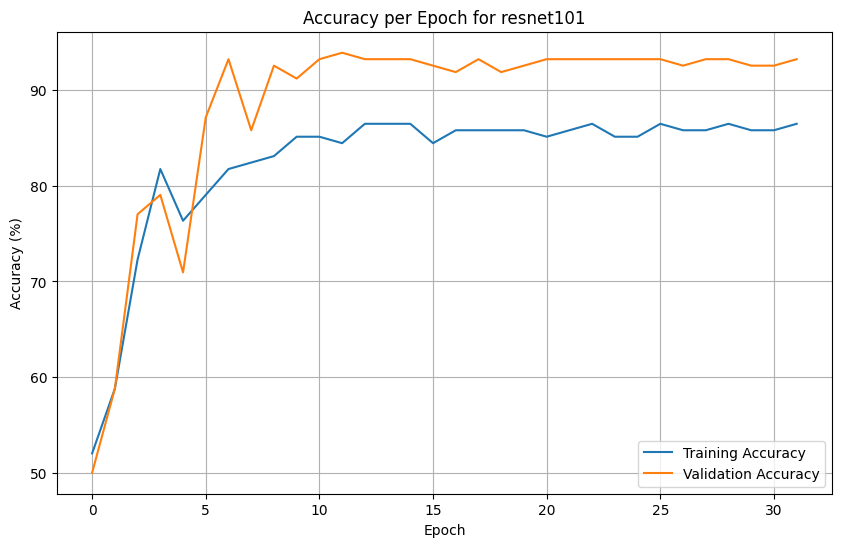

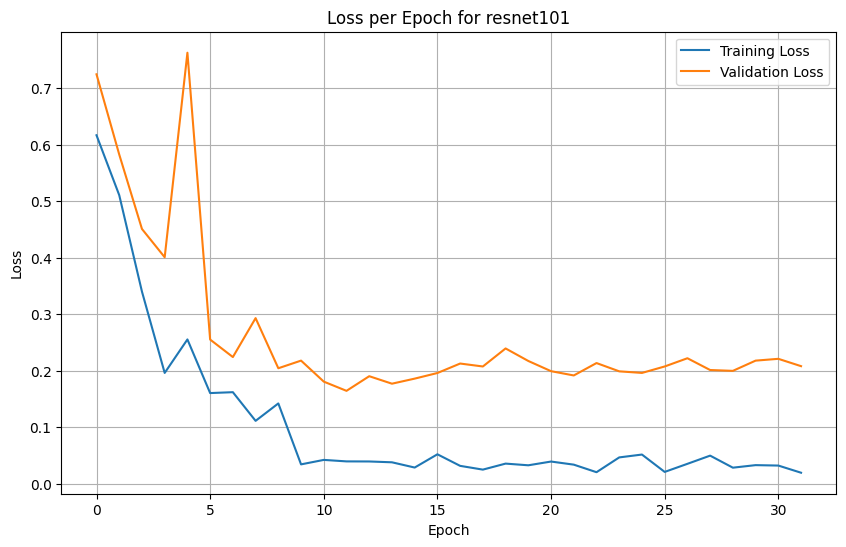

In [21]:
# Assuming you have lists like train_losses, train_accuracies,
# val_losses, and val_accuracies populated during training

# Plotting Accuracy Curve
plt.figure(figsize=(10, 6))
plt.plot(train_acc_list_resnet101, label='Training Accuracy')
plt.plot(val_acc_list_resnet101 , label='Validation Accuracy')
plt.title('Accuracy per Epoch for resnet101')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Loss Curve
plt.figure(figsize=(10, 6))
plt.plot(train_loss_list_resnet101, label='Training Loss')
plt.plot(val_loss_list_resnet101, label='Validation Loss')
plt.title('Loss per Epoch for resnet101')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

XGBOOSTING

Loading train and validation datasets...
Classes found: ['Benign', 'Malignant']
Loading cached CNN features...
Feature shape (Train): (148, 2048), Labels (Train): (148,)
Feature shape (Validation/Test): (148, 2048), Labels (Validation/Test): (148,)
Training XGBoost classifier...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:11:11] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:11:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Evaluating XGBoost on the validation set (used as test set)...

✅ Evaluation Results:
Accuracy: 99.32%
AUC: 0.9996

Confusion Matrix:
 [[72  0]
 [ 1 75]]

Classification Report:
               precision    recall  f1-score   support

      Benign       0.99      1.00      0.99        72
   Malignant       1.00      0.99      0.99        76

    accuracy                           0.99       148
   macro avg       0.99      0.99      0.99       148
weighted avg       0.99      0.99      0.99       148

XGBoost model saved to: xgboost_breast_cancer_resnet101.pkl
Results saved to xgboost_results.csv
Evaluation history saved to xgboost_eval_history.csv


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [14:11:12] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:729: UserWarning: [14:11:12] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


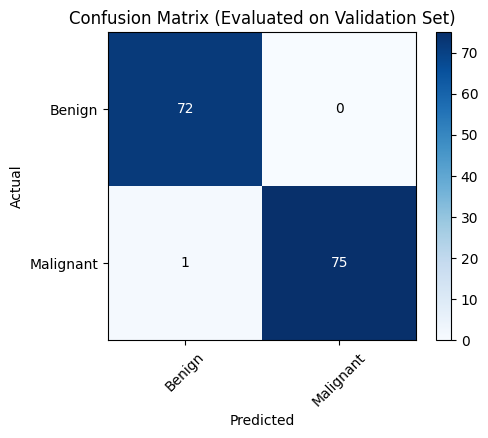

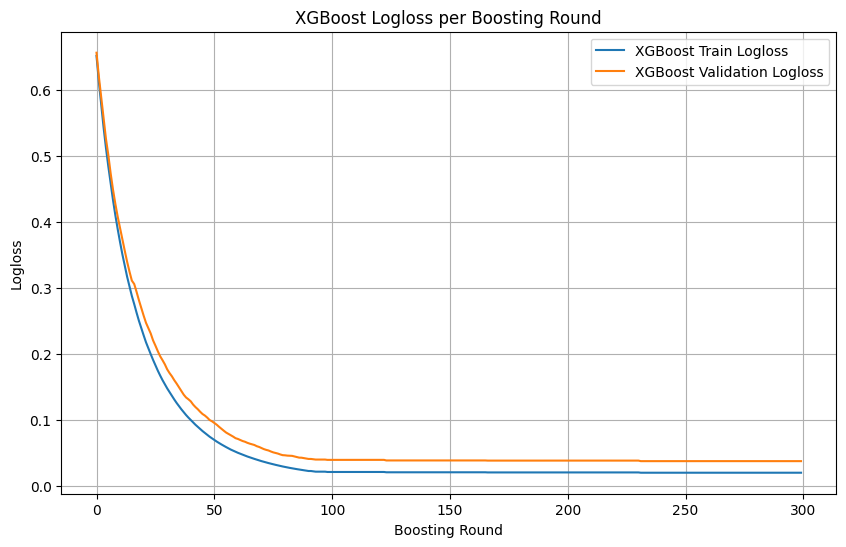

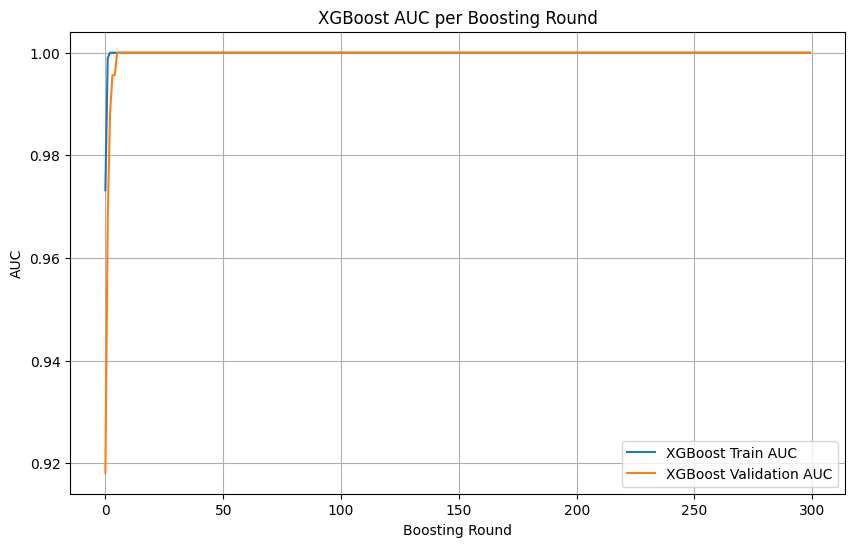

In [23]:
import os
import numpy as np
import pandas as pd
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import joblib
# from PIL import Image # PIL is imported by torchvision.datasets.ImageFolder

import Models # Import your Models file

# ================= CONFIG =================
train_data_path = '/content/Breast-cancer-dataset/breast_images_pydicom/train' # Path to training data
val_data_path = '/content/Breast-cancer-dataset/breast_images_pydicom/val'   # Path to validation data (will be used as test)
batch_size = 32
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
feature_file = "resnet101_features_split.npy" # Feature file name
label_file = "labels_split.npy"       # Label file name
model_save_path = "xgboost_breast_cancer_resnet101.pkl" # Model save path
resnet101_model_path = '/content/Breast-cancer-dataset/Classification task/model/breast-cancer-dataset/resnet101_final.pth' # Path to your trained ResNet101 model (using the _final.pth)


# ================= STEP 1: LOAD TRAIN AND VAL DATA =================
print("Loading train and validation datasets...")

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

train_dataset = ImageFolder(root=train_data_path, transform=transform)
val_dataset = ImageFolder(root=val_data_path, transform=transform) # This will be our test set for XGBoost

# Get class names (should be the same for train and val)
class_names = train_dataset.classes
print(f"Classes found: {class_names}")


# ================= STEP 2: FEATURE EXTRACTION (Trained ResNet101) =================
# Feature extraction will be done separately for train and val datasets
if not os.path.exists("X_train_feats.npy") or not os.path.exists("X_val_feats.npy"):
    print("Extracting CNN features (using trained ResNet101)...")
    # Load the trained ResNet101 model
    model = Models.Resnet101(num_classes=len(class_names)) # Make sure num_classes matches your model
    # Check if the saved model was DataParallel
    saved_model_state = torch.load(resnet101_model_path)
    if list(saved_model_state.keys())[0].startswith('module.'):
        model = torch.nn.DataParallel(model)
    model.load_state_dict(saved_model_state)
    # Remove the final classification layer for feature extraction
    if isinstance(model, torch.nn.DataParallel):
        model.module.fc = torch.nn.Identity()
    else:
        model.fc = torch.nn.Identity()

    model = model.to(device)
    model.eval()

    # Function to extract features from a DataLoader
    def extract_features_from_loader(loader, model, device):
        features_list = []
        labels_list = []
        with torch.no_grad():
            for imgs, labels in loader:
                imgs = imgs.to(device)
                feats = model(imgs)
                feats = feats.cpu().numpy()
                features_list.append(feats)
                labels_list.append(labels.numpy())
        return np.concatenate(features_list, axis=0), np.concatenate(labels_list, axis=0)

    # Create DataLoaders for feature extraction from ImageFolder datasets
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


    X_train_feats, y_train = extract_features_from_loader(train_loader, model, device)
    X_val_feats, y_val = extract_features_from_loader(val_loader, model, device) # y_val will be y_test for XGBoost evaluation

    # Save extracted features and labels
    np.save("X_train_feats.npy", X_train_feats)
    np.save("y_train.npy", y_train)
    np.save("X_val_feats.npy", X_val_feats) # Saving val features as X_val_feats
    np.save("y_val.npy", y_val) # Saving val labels as y_val (will be y_test for XGBoost evaluation)


    print(f"Saved extracted features and labels for train and val sets.")

else:
    print("Loading cached CNN features...")
    X_train_feats = np.load("X_train_feats.npy")
    y_train = np.load("y_train.npy")
    X_val_feats = np.load("X_val_feats.npy") # Loading val features as X_val_feats
    y_val = np.load("y_val.npy") # Loading val labels as y_val


print(f"Feature shape (Train): {X_train_feats.shape}, Labels (Train): {y_train.shape}")
print(f"Feature shape (Validation/Test): {X_val_feats.shape}, Labels (Validation/Test): {y_val.shape}")

# Assign val data to test variables for clarity in evaluation step
X_test_feats = X_val_feats
y_test = y_val

# Split train data further for XGBoost's internal validation during training
X_train_xgb, X_val_xgb, y_train_xgb, y_val_xgb = train_test_split(X_train_feats, y_train, test_size=0.25, random_state=42, stratify=y_train)


# ================= STEP 3: TRAIN XGBOOST =================
print("Training XGBoost classifier...")

xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    reg_lambda=1,
    random_state=42,
    tree_method='gpu_hist' if torch.cuda.is_available() else 'hist',
    use_label_encoder=False,
    eval_metric=['logloss', 'auc'] # Evaluate both logloss and AUC
)

eval_set = [(X_train_xgb, y_train_xgb), (X_val_xgb, y_val_xgb)]
evals_result = xgb_model.fit(X_train_xgb, y_train_xgb, eval_set=eval_set, verbose=False).evals_result()


# ================= STEP 4: EVALUATE on the original validation set (now used as test) =================
print("\nEvaluating XGBoost on the validation set (used as test set)...")
y_pred = xgb_model.predict(X_test_feats)
y_prob = xgb_model.predict_proba(X_test_feats)[:, 1]

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
cm = confusion_matrix(y_test, y_pred)

print("\n✅ Evaluation Results:")
print(f"Accuracy: {acc * 100:.2f}%")
print(f"AUC: {auc:.4f}")
print("\nConfusion Matrix:\n", cm)
# Ensure target_names matches the actual classes in y_test
target_names_eval = [class_names[i] for i in sorted(np.unique(y_test))]
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names_eval))


# ================= STEP 5: SAVE MODEL & LOG =================
joblib.dump(xgb_model, model_save_path)
print(f"XGBoost model saved to: {model_save_path}")

# Save results to CSV
results = pd.DataFrame({
    "Metric": ["Accuracy", "ROC-AUC"],
    "Value": [acc, auc]
})
results.to_csv("xgboost_results.csv", index=False)
print("Results saved to xgboost_results.csv")

# Save evaluation results to CSV (for XGBoost's internal validation split)
eval_results_df = pd.DataFrame({
    'Train Logloss': evals_result['validation_0']['logloss'],
    'Validation Logloss': evals_result['validation_1']['logloss'],
    'Train AUC': evals_result['validation_0']['auc'],
    'Validation AUC': evals_result['validation_1']['auc']
})
eval_results_df.to_csv("xgboost_eval_history.csv", index_label='Boosting Round')
print("Evaluation history saved to xgboost_eval_history.csv")


# ================= STEP 6: VISUALIZE =================

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix (Evaluated on Validation Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
# Add labels to the plot
tick_marks = np.arange(len(target_names_eval))
plt.xticks(tick_marks, target_names_eval, rotation=45)
plt.yticks(tick_marks, target_names_eval)
# Add text annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.show()

# Plot Logloss Curve (for XGBoost's internal validation split)
plt.figure(figsize=(10, 6))
plt.plot(evals_result['validation_0']['logloss'], label='XGBoost Train Logloss')
plt.plot(evals_result['validation_1']['logloss'], label='XGBoost Validation Logloss')
plt.title('XGBoost Logloss per Boosting Round')
plt.xlabel('Boosting Round')
plt.ylabel('Logloss')
plt.legend()
plt.grid(True)
plt.show()

# Plot AUC Curve (for XGBoost's internal validation split)
plt.figure(figsize=(10, 6))
plt.plot(evals_result['validation_0']['auc'], label='XGBoost Train AUC')
plt.plot(evals_result['validation_1']['auc'], label='XGBoost Validation AUC')
plt.title('XGBoost AUC per Boosting Round')
plt.xlabel('Boosting Round')
plt.ylabel('AUC')
plt.legend()
plt.grid(True)
plt.show()